# UPI Payments India

## Introduction

    This Model will help us Analyze and Visualize the trend of UPI Payments in India.

## DataSet 

   The dataset of this project is taken from the Kaggle Website. 
   Here is the link of the data set: https://www.kaggle.com/bhatnagardaksh/upipaymentsindia


## Importing Libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('UPI payments India.csv')
df.head()

,Month,No. of Banks live on UPI,Volume (in Mn),Value (in Cr.)
0,Dec-21,282,"4,566.30","826,848.22"
1,Nov-21,274,"4,186.48","768,436.11"
2,Oct-21,261,"4,218.65","771,444.98"
3,Sep-21,259,"3,654.30","654,351.81"
4,Aug-21,249,"3,555.55","639,116.95"


In [3]:
df.shape

(69, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Month                     69 non-null     object
 1   No. of Banks live on UPI  69 non-null     int64 
 2   Volume (in Mn)            69 non-null     object
 3   Value (in Cr.)            69 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.3+ KB


In [5]:
df.describe()

,No. of Banks live on UPI
count,69.000000
mean,126.173913
std,72.296765
min,21.000000
25%,57.000000
50%,139.000000
75%,164.000000
max,282.000000


In [6]:
df.columns

Index(['Month', 'No. of Banks live on UPI', 'Volume (in Mn)',
       'Value (in Cr.)'],
      dtype='object')


## Changing The Object Type Data to Float and Removing Null Values

In [7]:
df['Volume (in Mn)'] = pd.to_numeric(df['Volume (in Mn)'], errors='coerce')
df['Value (in Cr.)'] = pd.to_numeric(df['Value (in Cr.)'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     69 non-null     object 
 1   No. of Banks live on UPI  69 non-null     int64  
 2   Volume (in Mn)            46 non-null     float64
 3   Value (in Cr.)            10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ KB


In [9]:
df.isna().sum()

Month                        0
No. of Banks live on UPI     0
Volume (in Mn)              23
Value (in Cr.)              59
dtype: int64

In [10]:
df = df.dropna() # For removing Null Values.

In [11]:
df.isna().sum()

Month                       0
No. of Banks live on UPI    0
Volume (in Mn)              0
Value (in Cr.)              0
dtype: int64

## Visualization of Data

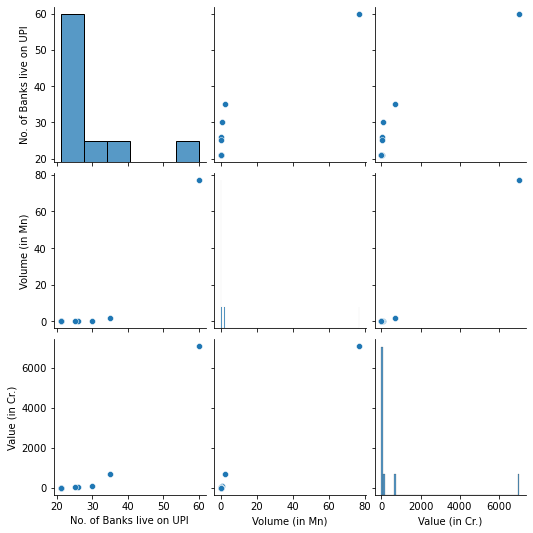

In [12]:
# For this we will use seaborn pairplot function
sns.pairplot(df)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume (in Mn)', ylabel='Density'>

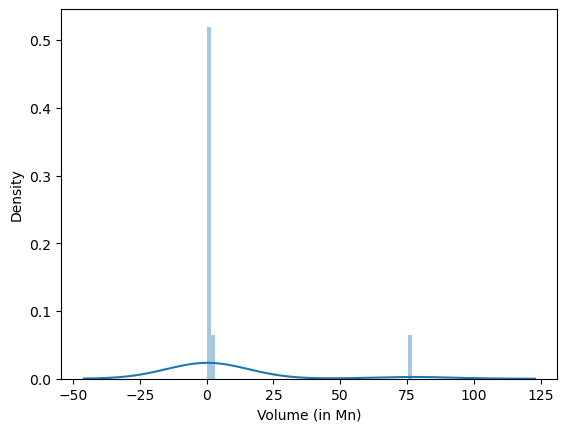

In [13]:
sns.distplot(df['Volume (in Mn)'])

<AxesSubplot:>

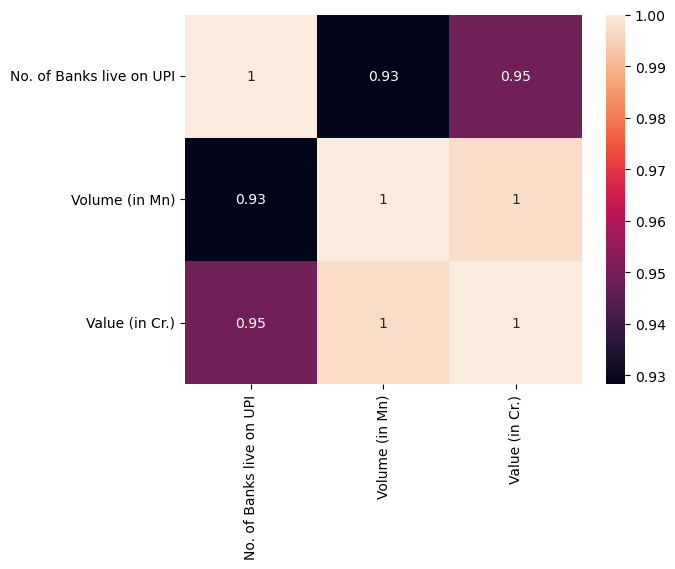

In [14]:
sns.heatmap(df.corr(), annot=True)

## Model Creation

   After seeing the DataSet I decided to go with:
   
  * Linear Regression: Linear regression analysis is used to predict the value of a variable based on the value of another variable
   
  * Logistic Regression: Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.
   
  * Random Forest Classifier: Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. 
   
  * Decision Tree Classifier: Decision Tree Learning is supervised learning approach used in statistics, data mining and machine learning. In this formalism, a classification or regression decision tree is used as a predictive model to draw conclusions about a set of observations.


Lets Deploy the Models and see which one is better for our model.

As we have done all the required visualisations and data wrangling/cleaning operations, we shall focus on applying numerours ML algorithms to see if our model is able to predict correctly or not.

## Splitting the Data into train and test data

  * Importing the library from the sklearn.model_selection
  * Split the dataset into 80:20 ratio
  * X_train and y_train are the training dataset
  * X_test and y_test are the testing dataset
  * After the spliting of the dataset, the model is ready to be prepared.

In [15]:
X = df[['Volume (in Mn)', 'No. of Banks live on UPI']]
y = df[['Value (in Cr.)']]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#### Importing the Required Libraries for the Model Creation

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Linear Regression Model

In [20]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
predictions = lm.predict(X_test)

[-722.20039125]


In [21]:
# Metrics for Linear Regression Model.
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 46.05920455802361
MSE: 2124.9831680249576
RMSE: 46.09753971770031


### Logistic Regression

  * In here there is an continuous data type error to solve that we use

In [22]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
classifier = LogisticRegression()
classifier.fit(X_train, y_transformed)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
print(classifier.intercept_)

[ 23.88273943  12.3265446    0.5105044   -2.36547898 -13.00084028
 -19.79236145  -1.56110772]


In [27]:
predictions = classifier.predict(X_test)

In [28]:
# Metrics for Logistic Regression
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.545
MSE: 4.77405
RMSE: 2.1849599538664317


## Random Forest Classifier

In [29]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# Create model object
rfc = RandomForestClassifier(n_estimators = 250,n_jobs=-1)
# Fit model to training data
rfc.fit(X_train,y_transformed)
y_pred_rfc = rfc.predict(X_test)

In [31]:
# Metrics for Random Forest Classifier
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rfc))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rfc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfc)))

MAE: 1.045
MSE: 2.1840499999999996
RMSE: 1.4778531726798843


### Decision Tree Model

In [32]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_transformed)
predictions = dtree.predict(X_test)

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.045
MSE: 2.1840499999999996
RMSE: 1.4778531726798843




## So after comparing these above models we get to see that:
    
   * Decision Tree Model
   
   * Random Forest Model
   
## is best suited for our problem